<a href="https://colab.research.google.com/github/lochuynhk/lochuynhk.github.io/blob/master/Loc_Huynh_Build_Week_Unit_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [97]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance (5).csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['insurance.csv']))

In [99]:
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*
    !pip install plotly==4.*
    !pip install bubbly
    !pip install bubbles
    !pip install sqlalchemy

In [100]:
print(df.shape)
df

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [101]:
smoker = {'yes': 1, 'no': 0}

df.smoker = [smoker[item] for item in df.smoker]

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [0]:
sex = {'male': 1, 'female': 0}
region = {'northeast': 0, 'southeast': 1, 'southwest': 2, 'northwest': 3}

df.sex = [sex[item] for item in df.sex]
df.region = [region[item] for item in df.region]

In [103]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, r2_score

target = 'charges'
y = df[target]
ypred = [y.mean()] * len(y)
print('Mean Baseline:')
print('Mean Absolute Error', mean_absolute_error(y, ypred))
print('R^2 score', r2_score(y, ypred))

Mean Baseline:
Mean Absolute Error 9091.12658113703
R^2 score 0.0


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
guess = df['charges'].mean()

In [0]:
errors = guess - df['charges']

In [107]:
mean_absolute_error

<function sklearn.metrics._regression.mean_absolute_error>

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model = LinearRegression()

In [110]:
type(df[['age']])

pandas.core.frame.DataFrame

In [111]:
type(df['charges'])

pandas.core.series.Series

In [112]:
df['charges'].shape

(1338,)

In [0]:
features = ['age']
target = 'charges'
X_train = df[features]
y_train = df[target]

In [114]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
age = 36
X_test = [[age]]
y_pred = model.predict(X_test)
y_pred

array([12443.89927807])

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

In [117]:
train, test = train_test_split(df, train_size =0.80, test_size=0.20, random_state=42)


target = 'charges'
train_features = train.drop(columns=[target])

features = train_features.select_dtypes(include='number').columns.tolist()
print('features', features)

#cardinality = train_features.select_dtypes(exclude='number').nunique()
#categorical_features = cardinality[cardinality <= 50].index.tolist()
#features = numeric_features + categorical_features




features ['age', 'sex', 'bmi', 'children', 'smoker', 'region']


In [118]:
features

['age', 'sex', 'bmi', 'children', 'smoker', 'region']

In [0]:
X_train = train[features]
y_train = train[target]

X_test = test[features]

In [0]:
target = ['charges']
ytrain = train[target]
ytest = test[target]

In [121]:
features = ['age', 'bmi', 'children', 'smoker', 'sex']
print(f'Linear Regression, dependent on: {features}')

Xtrain = train[features]
Xtest = test[features]

Linear Regression, dependent on: ['age', 'bmi', 'children', 'smoker', 'sex']


In [122]:
model = LinearRegression()
model.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
from sklearn.metrics import mean_absolute_error

ypred = model.predict(Xtrain)
mae = mean_absolute_error(ytrain, ypred)
print(f'Train Error: {mae:.2f}')

Train Error: 4210.69


In [124]:
ypred

array([[ 7100.52346994],
       [ 7934.40502535],
       [ 9396.61793405],
       ...,
       [11034.25297612],
       [37497.10777345],
       [11810.64194074]])

In [125]:
train, val = train_test_split(train, random_state=42)
train.shape, val.shape

((802, 7), (268, 7))

In [126]:
target = 'charges'
y_train = train[target]
y_train.value_counts(normalize=True)

8825.08600     0.001247
8302.53565     0.001247
1720.35370     0.001247
26018.95052    0.001247
18838.70366    0.001247
                 ...   
12269.68865    0.001247
21472.47880    0.001247
13462.52000    0.001247
10579.71100    0.001247
9140.95100     0.001247
Name: charges, Length: 802, dtype: float64

In [127]:
features = ['age', 'bmi', 'children', 'sex', 'smoker', 'region']
target = 'charges'

X_train = train[features]
y_train = train[target]
X_test = test[features]
X_val = val[features]
y_val = val[target]
y_test = test[target]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((802, 6), (802,), (268, 6), (268,), (268, 6), (268,))

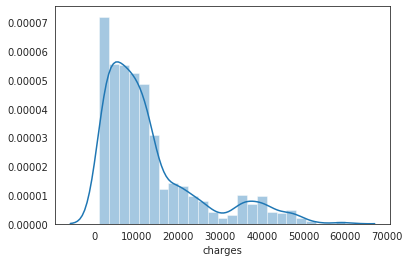

In [128]:
%matplotlib inline
import seaborn as sns
sns.distplot(y_train);

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
import warnings

In [0]:
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

In [131]:
X_train.head()

,age,bmi,children,sex,smoker,region
40,24,26.600,0,0,0,0
994,27,20.045,3,0,1,3
165,47,28.215,4,1,0,0
1057,45,31.790,0,0,0,1
418,64,39.160,1,1,0,1


In [132]:
X_val.head()

,age,bmi,children,sex,smoker,region
1049,49,30.900,0,1,1,2
257,38,40.150,0,0,0,1
1022,47,36.080,1,1,1,1
1071,63,31.445,0,1,0,0
17,23,23.845,0,1,0,0


In [133]:
X_train_encoded.head()

,age,bmi,children,sex,smoker,region
40,24,26.600,0,0,0,0
994,27,20.045,3,0,1,3
165,47,28.215,4,1,0,0
1057,45,31.790,0,0,0,1
418,64,39.160,1,1,0,1


In [134]:
X_val_encoded.head()

,age,bmi,children,sex,smoker,region
1049,49,30.900,0,1,1,2
257,38,40.150,0,0,0,1
1022,47,36.080,1,1,1,1
1071,63,31.445,0,1,0,0
17,23,23.845,0,1,0,0


In [0]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)

In [0]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

In [137]:
X_train_scaled[:5]

array([[-1.07486141, -0.63857464, -0.90396338, -1.0227015 , -0.50894665,
        -1.34207438],
       [-0.86146785, -1.70610151,  1.52071432, -1.0227015 ,  1.9648425 ,
         1.38284626],
       [ 0.56115588, -0.37556077,  2.32894022,  0.97780241, -0.50894665,
        -1.34207438],
       [ 0.41889351,  0.20665259, -0.90396338, -1.0227015 , -0.50894665,
        -0.4337675 ],
       [ 1.77038605,  1.40690783, -0.09573748,  0.97780241, -0.50894665,
        -0.4337675 ]])

In [138]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train_encoded, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [139]:
# 1. Import estimator class
from sklearn.linear_model import LinearRegression

# 2. Instantiate this class
model = LinearRegression()

# 3. Arrange X feature matrices (already did y target vectors)
features = ['age', 'children', 'bmi']
X_train = train[features]
X_val = val[features]

# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# 4. Fit the model
model.fit(X_train_imputed, y_train)

# 5. Apply the model to new data.
# The predictions look like this ...
model.predict(X_val_imputed)

array([14453.54451429, 15167.59328682, 16292.62772124, 17421.08395529,
        7040.74212282, 12711.08731052, 10960.18935755,  8837.99612606,
       14236.09504539, 13825.45288123, 15185.97961144, 15718.84881089,
       12522.58006146, 12803.34834695, 13691.82304353, 14414.01338659,
       18824.03955859, 16439.76485696, 10367.52939542, 13785.47134545,
       20960.55529473,  9194.48547922, 17987.26034133,  6103.18050803,
       11056.02079888, 15188.12711407, 15792.22748348, 17627.58905612,
       21641.10067614, 13004.52401311, 10422.68034303, 18411.03001297,
       16817.24909586, 10862.7937789 , 14700.76508959, 12494.06260728,
        7605.16013511, 12371.56269178, 15175.19515509, 11309.38601547,
        8854.53478275,  8248.1719741 , 11293.96043198, 11203.04365403,
        9906.99444477, 14348.58073605, 18042.67679892, 11423.72003009,
       13041.36727988, 18809.69403568, 18414.82095273, 13169.23357891,
        7388.40028583, 15046.0552151 ,  8348.30038879,  8957.12052912,
      

In [140]:
y_pred = linear.predict(X_val_encoded)
print('Linear Regression:')
print('Mean Absolute Error', mean_absolute_error(y_val, y_pred))
print('R^2 score', r2_score(y_val, y_pred))

Linear Regression:
Mean Absolute Error 4573.522705223291
R^2 score 0.7274030687712789


In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model = LinearRegression()

In [143]:
type(df[['age']])

pandas.core.frame.DataFrame

In [144]:
df[['age']]

,age
0,19
1,18
2,28
3,33
4,32
...,...
1333,50
1334,18
1335,18
1336,21


In [0]:
features = ['age', 'smoker', 'bmi', 'sex', 'children', 'region']
target = 'charges'
X_train = df[features]
y_train = df[target]

In [146]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
age = 37
smoker = 0
bmi = 22
children = 2
sex = 1
region = 3
X_test = [[age, smoker, bmi, sex, children, region]]
y_pred = model.predict(X_test)
y_pred

array([5260.65095545])

In [148]:
model.coef_

array([  257.78039376, 23811.62382151,   321.38134389,  -129.50258634,
         477.78663538,   -98.27183477])

In [149]:
model.intercept_

-11878.868359456308

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('white')
import pandas as pd

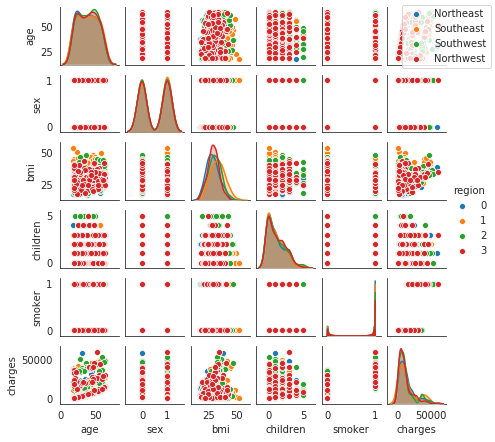

In [151]:
x = sns.pairplot(train, hue="region", height=1)
new_labels = ['Northeast', 'Southeast', 'Southwest', 'Northwest']
x.fig.legend(labels=new_labels);


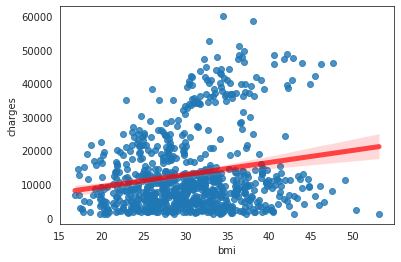

In [152]:
sns.regplot(x=train['bmi'], y=train['charges'], line_kws={'color':'r','alpha':0.7,'lw':5});

In [153]:
import plotly.express as px
import plotly.graph_objects as go
fig1 = px.box(train, x='sex', y='charges', points='all', color='sex', width=800, height=400)
fig1.update_xaxes(showticklabels=False)
fig1.update_layout(title = 'Female vs Male')
fig1.show()
#sns.boxplot(x=train['sex'], y=train['charges']);

In [154]:
import chart_studio.plotly as py
py.plot(fig1, filename='sex', auto_open=True)

'https://plot.ly/~lkhuynh/9/'

In [155]:
import chart_studio.tools as tls 
tls.get_embed('https://plot.ly/~lkhuynh/9/')

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~lkhuynh/9.embed" height="525" width="100%"></iframe>'

In [156]:
import plotly.express as px
fig2 = px.scatter(train, x='age', y='charges', color='bmi', size='sex', width=800,
                 height=350)

fig2.show()

In [157]:
import chart_studio.plotly as py
py.plot(fig2, filename='age', auto_open=True)

'https://plot.ly/~lkhuynh/7/'

In [158]:
import chart_studio.tools as tls 
tls.get_embed('https://plot.ly/~lkhuynh/7/')

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~lkhuynh/7.embed" height="525" width="100%"></iframe>'

In [0]:
fig = px.parallel_categories(train, color='region', color_continuous_scale=px.colors.sequential.Inferno)

In [160]:
fig.show()

In [0]:
import matplotlib.pyplot as plt
import bubbles
from bubbly.bubbly import bubbleplot
from plotly.offline import init_notebook_mode, iplot

In [162]:
figure = bubbleplot(dataset=train, x_column='bmi', y_column='charges', bubble_column='smoker',
                    time_column='age', color_column='sex', y_title='Yearly Premium', x_title='BMI', width=800)
iplot(figure, config={'scrollzoom': True});

/usr/local/lib/python3.6/dist-packages/plotly/offline/offline.py:159: UserWarning:


Unrecognized config options supplied: ['scrollzoom']



In [163]:
!pip install chart_studio


In [0]:
import chart_studio

In [0]:
username = 'lkhuynh'
api_key = 'KZ8fMzxSJtT0XoMN58ue'

chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [166]:
import chart_studio.plotly as py
py.plot(figure, filename='bmi', auto_open=True)

'https://plot.ly/~lkhuynh/1/'

In [167]:
import chart_studio.tools as tls 
tls.get_embed('https://plot.ly/~lkhuynh/1/')

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~lkhuynh/1.embed" height="525" width="100%"></iframe>'